In [ ]:
from interpretdl.common.file_utils import download_and_decompress
!ln -s ../tutorials/assets assets
url = 'https://github.com/PaddlePaddle/InterpretDL/files/8589193/clip.zip'
download_and_decompress(url, 'assets/')

[CLIP](https://arxiv.org/abs/2103.00020) is a bi-modal model that give predictions of an image according to the texts. The best part of CLIP is its ability of zero shot prediction. Here we aim to see the correspondances between the image and the texts.

In [ ]:
# (optional) https://github.com/AgentMaker/Paddle-CLIP.
!pip install paddleclip -i https://pypi.tuna.tsinghua.edu.cn/simple

# For the reason of accessing the attention maps, we have to modified some codes from 
# https://github.com/AgentMaker/Paddle-CLIP.
# So just installing the requirements is OK too.
# !pip install -r assets/clip/requirements.txt -i https://pypi.tuna.tsinghua.edu.cn/simple

In [1]:
import paddle
from PIL import Image
from assets.clip import tokenize, load_model

device = 'gpu:1'
paddle.set_device(device)

# Load the model
paddle_model, transforms = load_model('ViT_B_32', pretrained=True)

W0429 17:08:51.225307 17800 device_context.cc:447] Please NOTE: device: 1, GPU Compute Capability: 7.0, Driver API Version: 10.2, Runtime API Version: 10.2
W0429 17:08:51.229713 17800 device_context.cc:465] device: 1, cuDNN Version: 7.6.


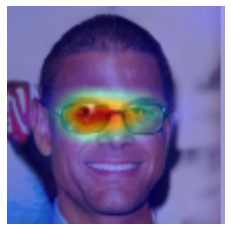

In [3]:
import interpretdl as it
texts = ["a man with eye glasses"]
text_tokenized = tokenize(texts)

algo = it.GAInterpreter(paddle_model, device)
text_relevance, image_relevance = algo.interpret("assets/glasses.png", texts, text_tokenized.numpy(), crop_to=224)

In [4]:
# corresponding text visualization.
from IPython.core.display import display, HTML

CLS_idx = text_tokenized.argmax(axis=-1).item()
R_text = text_relevance[0, CLS_idx, 1:CLS_idx]
text_scores = R_text / R_text.sum()
text_scores = text_scores.flatten()
print(text_scores)

words = texts[0].split(" ")
tags = ["<td>"]
for word, score in zip(words, text_scores):
    if score > 0:
        hue = 120
        sat = 75
        lig = 100 - int(100 * score)
    else:
        hue = 0
        sat = 75
        lig = 100 - int(-40 * score)
    color_html = "hsl({}, {}%, {}%)".format(hue, sat, lig)
    unwrapped_html = '<mark style="background-color: {color}; opacity:1.0; \
                line-height:1.75"><font color="black"> {word}\
                </font></mark>'.format(color=color_html, word=word)
    tags.append(unwrapped_html)
tags.append("</td>")
display(HTML("".join(tags)))

[0.02418203 0.04794106 0.00748556 0.23357227 0.6868191 ]


Here we can see that the heatmap in the image is exactly the eye glasses, as indicated by the `text_relevance`. More interesting examples can be tried.